In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random as rd

On veut calculer epsilon barre (le min )

In [ ]:
# Variables

# i entre 1 et n -> désigne un agent

# delta_i -> entre 0 et 1 (à choisir)

# theta(0) au hasard dans R^np : initialisation du modèle
# on calcule ensuite chaque étape en utilisant les formules 

# ti entre 1 et Ti, Ti le nombre d'itérations pour chaque agent

#La somme des Ti vaut T, le nombre total d'itérations

# Il nous fait les epsilon de chaque étape, pour calculer le epsilon global. 
# Il s'agit ici de déterminer le epsilon global en fonction du delta global qu'on veut fixer

# On a une formule pour produire du bruit eta_i a partir d'une loi de Laplace de paramiètre s_i, 
# si est lui meme fixé par une relation avec epsilon_i, le paramètre de Lipschitz L_O, et m_i la taille de l'échantillon d'entrainement de l'agent

In [4]:
# exemple d'implémentation du calcul du théorème 1 : en utilisant une liste des epsilon_i, et un delta_barre choisi

e = math.exp
sq = math.sqrt
log = math.log

def epsilon_barre (delta_barre, epsilon_list):      # delta doit etre plus petit que 1, sinon on a une erreur dnas une racine carré
    
    s1 = 0
    s2 = 0
    s3 = 0
    
    for i in range (len(epsilon_list)):
        s1 += epsilon_list[i]
        
    if delta_barre == 0:
        return s1
    else :
        eps = epsilon_list
        s_a = 0
        for i in range (len(epsilon_list)):
            s_a += eps[i]*(1-2/(e(eps[i])+1))
        s_b = 0
        for i in range (len(epsilon_list)):
            s_b += eps[i]**2
            
        s2 = s_a + sq( 2*s_b * log( e(1)* sq(s_b) / delta_barre ) )
        s3 = s_a + sq( 2*s_b * log(1/delta_barre))
        
        return min(s1, min(s2, s3))
    
    

In [51]:
print(rd.random()/5)

0.12774956408267807


In [17]:
# on prend des epsilon un peu au hasard anyway, pareil pour le nombre d'itérations

n = 20
epsilon_liste = np.array([rd.random()/5 for i in range (n)])


In [21]:
delta = 1
print(epsilon_liste)

print(epsilon_barre(delta, epsilon_liste))

[0.16724289 0.13136416 0.01985779 0.04133856 0.05667536 0.04828815
 0.1997509  0.09161524 0.0079811  0.02032842 0.06726138 0.14729484
 0.09131919 0.13980237 0.08849913 0.13774062 0.06655038 0.00317983
 0.18859421 0.16129895]
0.12403562173839436


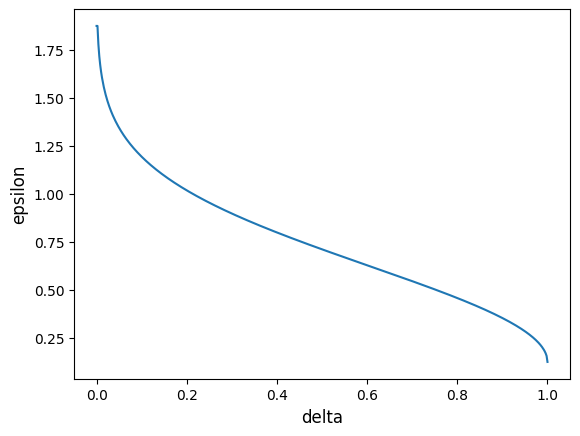

In [19]:
X = np.linspace(0, 1, 500)

liste_resultats = np.array([epsilon_barre(x, epsilon_liste) for x in X])

plt.plot(X, liste_resultats)
plt.xlabel("delta", fontsize = 12)
plt.ylabel("epsilon", fontsize = 12)

plt.show()

Reste à implémenter l'algo avec des agents et a essayer de faire un truc asynchrone (je pense que c'est le point le plus technique)

Aussi générer les données c'est pas évident